# Jupyter Notebook for Julia
## Installing the Julia to the Google Colab
#### Run the following two cells.
"Run" means 
- Put the cursor on the cel and shift+enter on Jupyter Notebook
- Tap the circle near the upper left corner of the cell on Google Colab  

In [ ]:
!curl -fsSL https://install.julialang.org | sh -s -- --yes

In [ ]:
!julia -v

## Installing packages
#### Run the following cell. The installation takes a few minutes.  

In [ ]:
using Pkg
Pkg.add("LowRankApprox")
Pkg.add("Images")
Pkg.add("Plots")
Pkg.add("Colors")
Pkg.add("Downloads")
Pkg.add("FileIO")

In [8]:
using Random
using LinearAlgebra
using LowRankApprox
using Images
using Plots
using Colors
using Downloads
using FileIO

## Topics
- RGB images
- RGB movies
- SVD and approximation of images
- Haar wavelet decomposition of images


## RGB images
The data of an RGB image is a triplet of matrices of the same size. This is essentially a triplet of grayscale images of the same size. These three grayscale images, colored red, green, and blue, are then overlaid to form an RGB image.
#### Run the following cell to create three $m{\times}n=10\times15$ matrices $R,G,B$ by random numbers. 

In [5]:
Random.seed!(1)
m, n = 10, 15 # size of matrices

Z = zeros(m, n); # zero matrix
R = rand(m, n);
G = rand(m, n);
B = rand(m, n) # See below

10×15 Matrix{Float64}:
 0.670414   0.643352  0.376138   0.983634   …  0.899505  0.380349   0.221796
 0.691898   0.100056  0.218766   0.40892       0.424926  0.958143   0.950771
 0.192718   0.164962  0.60248    0.0424498     0.237027  0.610986   0.839523
 0.516169   0.959669  0.753166   0.705895      0.189413  0.619391   0.736151
 0.0475605  0.72755   0.852577   0.0647826     0.049791  0.849654   0.777125
 0.245685   0.436295  0.88632    0.792918   …  0.587347  0.515305   0.0444534
 0.979139   0.396001  0.0642346  0.080433      0.171102  0.0882561  0.0745833
 0.0294498  0.419402  0.890999   0.998768      0.265295  0.811548   0.626937
 0.224011   0.525583  0.988467   0.0620525     0.480608  0.0926662  0.601864
 0.80577    0.21062   0.292272   0.199147      0.582327  0.494502   0.440245

#### Run the following cell to colorize  $R,G,B$, and show red, green, blue and RGB images.

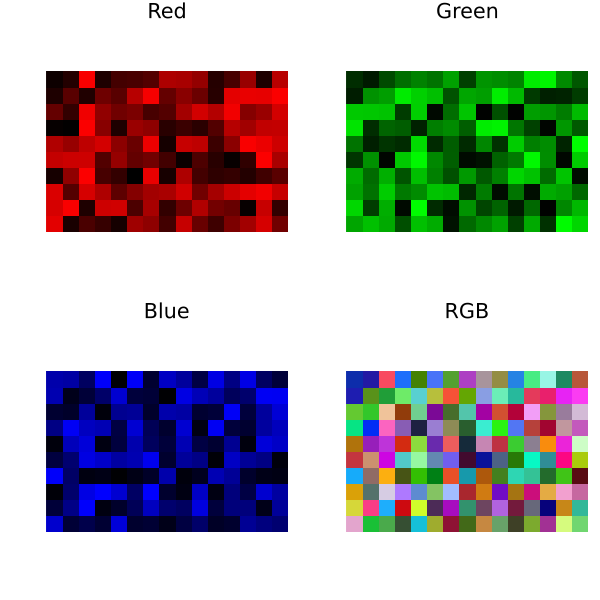

In [11]:
imgR = colorview(RGB, R, Z, Z)
imgG = colorview(RGB, Z, G, Z)
imgB = colorview(RGB, Z, Z, B)
imgRGB = colorview(RGB, R, G, B)

p1 = plot(imgR, grid=false, axis=false, title="Red")
p2 = plot(imgG, grid=false, axis=false, title="Green")
p3 = plot(imgB, grid=false, axis=false, title="Blue")
p4 = plot(imgRGB, grid=false, axis=false, title="RGB")

plot(p1, p2, p3, p4, layout=(2,2), size=(600,600))

In [ ]:
# If you want to save the abovem run this cell.
savefig("rgb_matrix.png")

## RGB movies
The data of an RGB movie is the finite number of triplets of matrices of the same size. This is essentially a sequence of RGB images of the same size. 
#### Run the following cell to create 100 $m{\times}n=10\times15$ RGB images by random numbers. 

In [14]:
Random.seed!(1)
m, n = 10, 15 # size of matrices
K = 100 # steps, length of the sequence

Z = zeros(m, n);
RR = rand(m, n, K);
GG = rand(m, n, K);
BB = rand(m, n, K);


#### Run the following cell to see the movie.

[ Info: Saved animation to /home/hc/Dropbox/Julia/ATCM/ATCM2026/Jupyter/rgb_animation.gif


Plots.AnimatedGif("/home/hc/Dropbox/Julia/ATCM/ATCM2026/Jupyter/rgb_animation.gif")
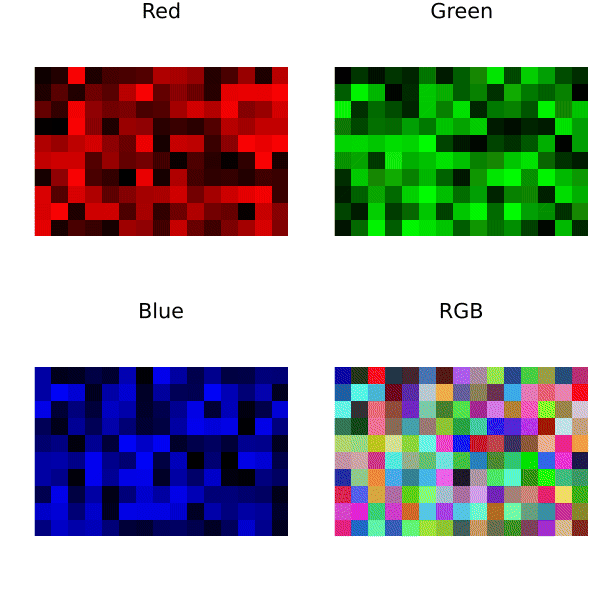

In [16]:
anim2 = @animate for k=1:K

movieR = colorview(RGB, RR[:,:,k], Z, Z)
movieG = colorview(RGB, Z, GG[:,:,k], Z)
movieB = colorview(RGB, Z, Z, BB[:,:,k])
movieRGB = colorview(RGB, RR[:,:,k], GG[:,:,k], BB[:,:,k])

p1 = plot(movieR, grid=false, axis=false, title="Red")
p2 = plot(movieG, grid=false, axis=false, title="Green")
p3 = plot(movieB, grid=false, axis=false, title="Blue")
p4 = plot(movieRGB, grid=false, axis=false, title="RGB")

plot(p1, p2, p3, p4, layout=(2,2), size=(600,600))

end
gif(anim2, "rgb_animation.gif", fps = 3)	

## Singular value decomposition and low rank approximation
In general an $m{\times}n$ matrix $A=\begin{bmatrix}\vec{a}_1 & \dotsb & \vec{a}_n \end{bmatrix}$ has a specific nonnegative integer which is called as the rank of  $A$ defined by 

$$r
:=
\operatorname{dim}\bigl(
\{
A\vec{x}
=
x_1\vec{a}_1+\dotsb+x_n\vec{a}_n 
\ \vert \ 
\vec{x} \in \mathbb{R}^n
\}
\bigr).$$ 

It follows that $1 \leqq r \leqq \min\{m,n\}$ unless all the entries of $A$ are zero. It is known that there exist  

$$I=load("./CityU.jpg")\sigma_1 \geqq \dotsb \geqq \sigma_r>0,
\quad
\vec{u}_1,\dotsc,\vec{u}_r \in \mathbb{R}^m,
\quad
\vec{v}_1,\dotsc,\vec{v}_r \in \mathbb{R}^n$$

such that we have 

$$A=\sum_{j=1}^r\sigma_j\vec{u}_j\vec{v}_j^T.$$

Set 

$$A_k:=\sum_{j=1}^k\sigma_j\vec{u}_j\vec{v}_j^T, \quad k=1,\dotsc,r.$$

It is known that the rank of $A_k$ is $k$ and closest to $A$ among all the $m{\times}n$ matrices of rank $k$, that is, $A_k$ is the best approximation of $A$ among all the $m{\times}n$ matrices of rank $k$.   

We compute a $432\times768\times3$ RGB image of a hibiscus. All the R, G, B matrices are of rank $432$.

#### Run the following cell to compute the SVD of the RGB-elements of the picture.


In [15]:
url = "https://raw.githubusercontent.com/fiomfd/hands-on/refs/heads/main/data/hibiscus.jpg"
Downloads.download(url, "hibiscus.jpg")
I=load("./hibiscus.jpg");
X=imresize(I, ratio=1/5);
(p,q)=size(X);
AAA=channelview(X);
RRR=Array{Float64}(AAA[1,:,:]);
GGG=Array{Float64}(AAA[2,:,:]);
BBB=Array{Float64}(AAA[3,:,:]);

RU, RS, RV=psvd(RRR);
GU, GS, GV=psvd(GGG);
BU, BS, BV=psvd(BBB);
	
rank=60;
DR=zeros(p,q,rank);
DG=zeros(p,q,rank);
DB=zeros(p,q,rank);
for r=1:rank
    DR[:,:,r]=sum(RS[n]*RU[1:p,n]*(RV[1:q,n])' for n=1:r);
    DG[:,:,r]=sum(GS[n]*GU[1:p,n]*(GV[1:q,n])' for n=1:r);
    DB[:,:,r]=sum(BS[n]*BU[1:p,n]*(BV[1:q,n])' for n=1:r);
end

#### Run the following cell to see the movie of the best low rank approximation for $r=1,\dotsc,60$.

[ Info: Saved animation to /home/hc/Dropbox/Julia/ATCM/ATCM2026/Jupyter/rgb_animation2.gif


Plots.AnimatedGif("/home/hc/Dropbox/Julia/ATCM/ATCM2026/Jupyter/rgb_animation2.gif")
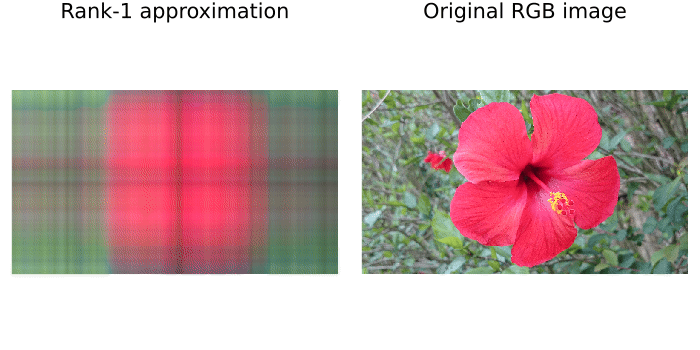

In [20]:
animsvd = @animate for k=1:rank

W=zeros(3,p,q,rank);
for r=1:rank
	W[1,:,:,r]=DR[:,:,r];
    W[2,:,:,r]=DG[:,:,r];
    W[3,:,:,r]=DB[:,:,r];
end

SVD1=plot(colorview(RGB,W[:,:,:,k]),
        title="Rank-$k approximation",
        xaxis=false, 
        xticks=false, 
        yaxis=false, 
        yticks=false, 
        grid=false);
SVD2=plot(colorview(RGB,X),
        title="Original RGB image",
        xaxis=false, 
        xticks=false, 
        yaxis=false, 
        yticks=false, 
        grid=false);
plot(SVD1,SVD2, layout=(1,2), size=(700,350))

end
gif(animsvd, "rgb_animation2.gif", fps = 3)	